### Subhechha Gautam W6

## Classification
- ### Gaussian Naive Bayes Clasifier
- load, and prepare dataset


In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from IPython.display import display
# load iris dataset
iris=load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species']=iris.target
iris_df['species']=iris_df['species'].map({0:'setosa',1: 'versicolor', 2:'virginica'})
display(iris_df.head())
X=iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y=iris_df['species']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Split data into test and train dataset

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# clustering
- k-means
- meanshift
- dbscan
K-means clustering algoritham
- Choose the Numbers of Clusters (k): We decide how many clusters you want the data divided into
- Initailize Cluster Centers: Randomly select k points from the data as initial cluster center ()
also called centroids.
- Assign data points to clusters: Each data point is assigned to the cluster whose centroid is closed(measured by distance, usually Enclidean).
- Update  centroids: For each cluster, compute the new centroid as the average of all points assigned to that cluster.
- Repeat Reassign points to clusters based on the updated centroids and recompute the centroids. This process is repeated until the centroids sop changing significantly or a maximum number of iterations is reached.

In [3]:
import pandas as pd
home_data = pd.read_csv('data/housing.csv',usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


# Plot scattered plot to visualize the data

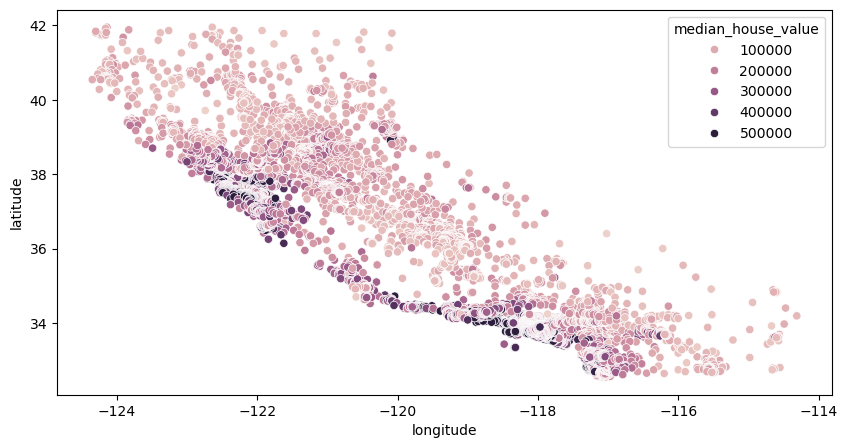

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.scatterplot(data=home_data, x='longitude', y='latitude',hue='median_house_value')
plt.show()

# Split Train/Test and Normalize Data

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']],home_data[['median_house_value']], test_size = 0.33, random_state=0)
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)



# Fit the data to the K-means Model and plot the clusters into clusters into clustes into scattered plot

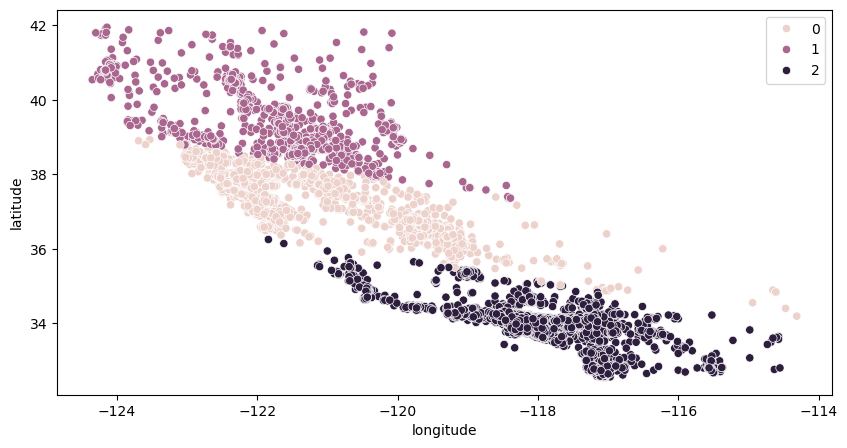

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

plt.figure(figsize=(10,5))
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)
plt.show()

# Evaluate Clustering Model using Silhouetee Score (lower score represents a better fit)

In [7]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

MemoryError: Unable to allocate 1.00 GiB for an array with shape (9706, 13828) and data type float64

Design Simple Artifical Neural Network
- 1 input
- 1 hidden layer
- 1 output layers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate = 0.1):
        
        # Initialize network parameters
        self.input_neurons = input_neurons
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.learning_rate = learning_rate
 
        # Random initialization of weights and biases
        np.random.seed(42)
        self.w1 = np.random.randn(input_neurons, hidden_neurons)
        self.b1 = np.random.randn(hidden_neurons)
        self.w2 = np.random.randn(hidden_neurons, output_neurons)
        self.b2 = np.random.randn(output_neurons)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivation(self, x):
        return x * (1-x)
    
    def forward_pass(self,x):
        self.z1 = np.dot(x, self.w1) + self.b1 # w1.x + b
        self.a1 = self.sigmoid(self.z1) # Apply sigmoid activation function f(z)  = sigmoid(z)
        self.z2 = np.dot(self.a1, self.w2) + self.b2 
        self.output = self.sigmoid(self.z2) # Apply sigmoid activation function

        return self.output
    
    def compute_loss(self,y_pred,y_true):
        return np.mean(np.square(y_true - y_pred))

    def backpropagate(self, x, y_true, y_pred):
        error_output = y_pred - y_true
        d_output = error_output * self.sigmoid_derivation(y_pred)
        error_hidden = d_output.dot(self.w2.T)
        d_hidden = error_hidden * self.sigmoid_derivation(self.a1)

        self.w2 -= self.a1.T.dot(d_output) * self.learning_rate
        self.b2 -= np.sum(d_output, axis=0) * self.learning_rate

        self.w1 -= x.T.dot(d_hidden) * self.learning_rate
        self.b1 -= np.sum(d_hidden, axis=0) * self.learning_rate

    def train(self, x, y, epochs =5000):
        for epoch in range(epochs):
            y_pred = self.forward_pass(x)

            # compute loss
            loss = self.compute_loss(y_pred, y)

            # Backpropagation and weights update
            self.backpropagate(x,y,y_pred)

            if epoch % 1000 == 0:
                print(self.w1,self.w2)
                print(f'Epoch {epoch}, Loss:{loss:.4f}')
        
    def predict(self, x):
        return self.forward_pass(x)

[[0.49671415]] [[14667.90786284]]
Epoch 0, Loss:86783878265.4901
[[0.49671415]] [[14667.90786284]]
Epoch 1000, Loss:86783823796.3995
[[0.49671415]] [[14667.90786284]]
Epoch 2000, Loss:86783823796.3995
[[0.49671415]] [[14667.90786284]]
Epoch 3000, Loss:86783823796.3995
[[0.49671415]] [[14667.90786284]]
Epoch 4000, Loss:86783823796.3995
[[0.49671415]] [[14667.90786284]]
Epoch 5000, Loss:86783823796.3995
[[0.49671415]] [[14667.90786284]]
Epoch 6000, Loss:86783823796.3995
[[0.49671415]] [[14667.90786284]]
Epoch 7000, Loss:86783823796.3995
[[0.49671415]] [[14667.90786284]]
Epoch 8000, Loss:86783823796.3995
[[0.49671415]] [[14667.90786284]]
Epoch 9000, Loss:86783823796.3995
[[0.49671415]] [[14667.90786284]]
Epoch 10000, Loss:86783823796.3995
[[0.49671415]] [[14667.90786284]]
Epoch 11000, Loss:86783823796.3995
[[0.49671415]] [[14667.90786284]]
Epoch 12000, Loss:86783823796.3995
[[0.49671415]] [[14667.90786284]]
Epoch 13000, Loss:86783823796.3995
[[0.49671415]] [[14667.90786284]]
Epoch 14000, 

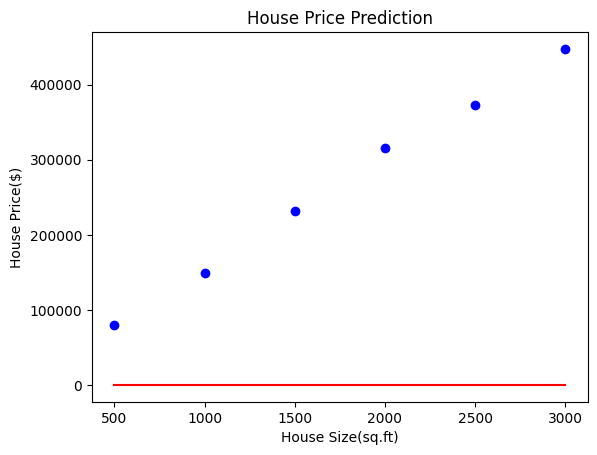

In [ ]:
# create some synthetic data for house sizes and corresponding prices

np.random.seed(42)

x = np.array([[500],[1000],[1500],[2000],[2500],[3000]])
y = x * 150 + (np.random.randn(*x.shape) * 10000) # Random noise

nn = NeuralNetwork(input_neurons=1, hidden_neurons=1, output_neurons=1, learning_rate=0.1)
nn.train(x, y, epochs=50000)

predictions = nn.predict(x)

# Plotting the data
plt.scatter(x,y,color='blue',label='Actual Prices') # Actual prices
plt.plot(x,predictions,color='red',label='Predicted prices') # Predicted prices
plt.xlabel('House Size(sq.ft)')
plt.ylabel('House Price($)')
plt.title('House Price Prediction')
plt.legend
plt.show()

In [ ]:
import tensorflow as a
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
(X_train, y_train), (X_test,y_test) = mnist.load_data()
#Normalize data (scale pixel values to range 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0
#Build the model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
    ])
#Set learning rate
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
)
early_stopping = EarlyStopping(
monitor='val_loss',
patience=3,
restore_best_weights=True
)
#Train the model
model.fit(X_train,y_train, epochs=5, batch_size=32)


test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

predictions = model.predict(X_test)
print(f"Prediciton for first test image: {np.argmax(predictions[0])}")

/home/sairash/mydata/python/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


2024-11-27 09:40:44.646605: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8943 - loss: 0.3466
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9551 - loss: 0.1593
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9611 - loss: 0.1382
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9656 - loss: 0.1233
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9690 - loss: 0.1154
 91/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9575 - loss: 0.2195

2024-11-27 09:41:06.251865: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9564 - loss: 0.2189
Test accuracy: 0.9623000025749207
211/313 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step

2024-11-27 09:41:06.766764: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step
Prediciton for first test image: 7


## Open a File from FileSystem
open(filename, mode, buffering) 
- filename: name of the files with full path that we want to open
- mode: operation mode (r,w,x,a,b,+)
- buffering: controls buffers

## File operations table
- mode- read-only mode
- w- write mode. creates/truncates the file
- x- exclusive creation. fails if the file exists.
- a- append mode. writes data at the end.
- b- binary mode. used with rb,wb.
- t- text mode (default).
- +- update mode(read and write).

## Read a text file and assign the content to a python variable 

In [ ]:
with open ('data/test.txt','r') as text_file:
    text_content = text_file.read()

print(text_content)

Finished her are its honoured drawings nor. 
Pretty see mutual thrown all not edward ten. 
Particular an boisterous up he reasonably frequently. Several any had enjoyed shewing studied two. Up intention remainder sportsmen behaviour ye happiness. Few again any alone style added abode ask. Nay projecting unpleasing boisterous eat discovered solicitude. Own six moments produce elderly pasture far arrival. Hold our year they ten upon. Gentleman contained so intention sweetness in on resolving.


## Read text file line by line

In [ ]:
#read text content line by line using (nextline()) and while loop
with open('data/test.txt','r') as text_file:
    line = text_file.readline()
    while line: #as long as there is a line
        print(line,end='')
        line = text_file.readline()#read the next line

#using for loop
with open('data/test.txt','r') as text_file:
    for line in text_file:
        print(line,end='')

#get all lines in list using readlines()
with open('data/test.txt','r') as text_file:
    lines= text_file.readlines()
    print(lines) 


Finished her are its honoured drawings nor. 
Pretty see mutual thrown all not edward ten. 
Particular an boisterous up he reasonably frequently. Several any had enjoyed shewing studied two. Up intention remainder sportsmen behaviour ye happiness. Few again any alone style added abode ask. Nay projecting unpleasing boisterous eat discovered solicitude. Own six moments produce elderly pasture far arrival. Hold our year they ten upon. Gentleman contained so intention sweetness in on resolving.Finished her are its honoured drawings nor. 
Pretty see mutual thrown all not edward ten. 
Particular an boisterous up he reasonably frequently. Several any had enjoyed shewing studied two. Up intention remainder sportsmen behaviour ye happiness. Few again any alone style added abode ask. Nay projecting unpleasing boisterous eat discovered solicitude. Own six moments produce elderly pasture far arrival. Hold our year they ten upon. Gentleman contained so intention sweetness in on resolving.['Finished

## Writing to Files: Open file for writing using open ('file','w')
- write(content) write at once
- writelines([line1,line2])
- append to files: Open file with open(file,'a')


In [ ]:
#write whole content at once
with open('new-text-1','w') as new_file:
    new_file.write('Replace content!')

#write line by line
with open('new-text-1','w') as new_file:
    new_file.writelines(['Hello\n','World\n'])

with open('new-text-1','w') as file:
    file.write('This should append on file-1.txt\n')

## Python Handling Directories

The os module provides the various functions for working with Directories . 
Create New Directory. 
◦ os.mkdir(dirname) create single directory 
◦ s.mkdirs(parent-dir/child-dir) create dir-1 and inside it create dir2 .
check if a Directory Exists 
◦ os.path.exists(path): Returns True if the path exists (both for file or directory) 
◦ os.path.isdir(path):Returns True if the path is a directory 
• List Files and Subdirectories in a Directory 
◦ os.listdir(dirname) : Returns list of all directory and files inside the given directory

| Function                           | Description                                                   |
|------------------------------------|---------------------------------------------------------------|
| `os.mkdir(path)`                   | Creates a directory.                                           |
| `os.makedirs(path)`                | Creates intermediate directories, if necessary.                |
| `os.path.exists(path)`             | Checks if a path exists (file or directory).                   |
| `os.path.isdir(path)`              | Checks if a path is a directory.                               |
| `os.listdir(path)`                 | Lists contents of a directory.                                 |
| `os.chdir(path)`                   | Changes the current working directory.                         |
| `os.rmdir(path)`                   | Removes an empty directory.                                    |
| `os.removedirs(path)`              | Removes intermediate empty directories.                        |
| `os.rename(src, dst)`              | Renames or moves a directory.                                  |
| `os.stat(path)`                    | Returns the status of a file or directory (permissions, size, etc.). |




Directory exists.
IT's a directory.
housing.csv
marketing-sales.csv
nep-india-china-gdp.csv
nepal-economy.csv
nepal-population-ethnic-group.json
product-data.csv
student-admission.csv
student.csv
student.json
student.xlsx
students_scores.csv
student_data
test.txt
user_data.csv
user_data.json
user_data.xlsx
wall.jpg


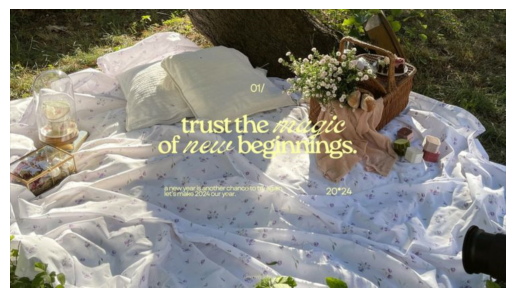

In [ ]:
import os 
import matplotlib.pyplot as plt
### Create New Directories

# Creating nested directories
# os.makedirs('p-dir/ch-dir')
# Check if the directory exists
if os.path.exists('test-dir'):
    print("Directory exists.")
else:
    os.mkdir('test-dir')
    print("Directory does not exist.")
if os.path.isdir('test-dir'):
    print("IT's a directory.")
else:
    print("It's not a directory.")

# List consists of the directory
contents = os.listdir('data')
for content in contents:

    print(content)




import matplotlib.pyplot as plt
from PIL import Image

# Path to the image
image_path = r"C:\Users\subhe\python-programming\data\wall.jpg"

# Open and display the image
if image_path.lower().endswith('.jpg'):
    try:
        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis('off')  # Hide axes
        plt.show()
    except Exception as e:
        print(f"Error opening image: {e}")
else:
    print("The file is not a JPG image.")
